In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
def load_and_preprocess_data(filepath):
    """Load and preprocess the ITSM data."""
    df = pd.read_csv(filepath, low_memory=False)
    
    # Create binary target (High Priority = 1 if Priority is 1 or 2)
    df['Priority_Label'] = df['Priority'].apply(lambda x: 1 if x in [1, 2] else 0)
    
    # Drop irrelevant/leak-prone columns
    drop_cols = ['Priority', 'Incident_ID', 'Close_Time', 
                 'Impact', 'Urgency', 'Open_Time', 'Reopen_Time']
    df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')
    
    # Fill missing values and encode categorical variables
    df = df.fillna("Unknown")
    label_encoders = {}
    
    for col in df.select_dtypes(include=['object', 'category']).columns:
        df[col] = df[col].astype(str)
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    
    return df, label_encoders

In [3]:
def train_evaluate_model(X, y, test_size=0.3, random_state=42):
    """Train and evaluate Random Forest classifier."""
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    clf = RandomForestClassifier(
        n_estimators=100, 
        class_weight='balanced', 
        random_state=random_state
    )
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return clf, X_test.columns

In [4]:
def plot_feature_importance(clf, feature_names, top_n=10):
    """Plot top N feature importances."""
    feat_importances = pd.Series(clf.feature_importances_, index=feature_names)
    feat_importances.nlargest(top_n).plot(kind='barh')
    plt.title(f"Top {top_n} Feature Importances")
    plt.show()

Confusion Matrix:
[[13732    40]
 [  130    80]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13772
           1       0.67      0.38      0.48       210

    accuracy                           0.99     13982
   macro avg       0.83      0.69      0.74     13982
weighted avg       0.99      0.99      0.99     13982



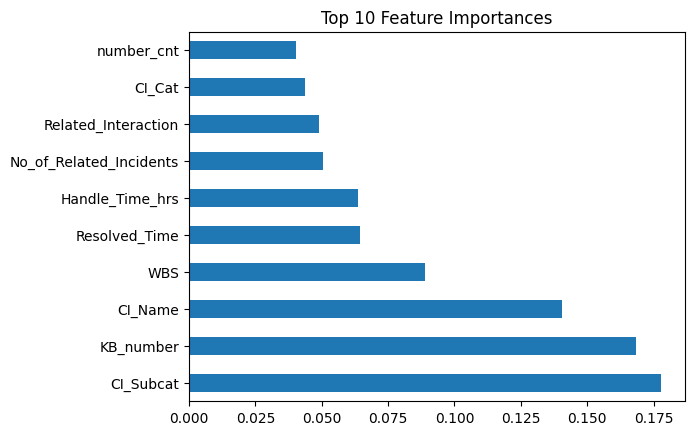

In [5]:
# Main execution
if __name__ == "__main__":
    # 1. Load and preprocess data
    df, label_encoders = load_and_preprocess_data("ITSM_data.csv")
    
    # 2. Prepare features and target
    X = df.drop('Priority_Label', axis=1)
    y = df['Priority_Label']
    
    # 3. Train and evaluate model
    clf, feature_names = train_evaluate_model(X, y)
    
    # 4. Visualize feature importance
    plot_feature_importance(clf, feature_names)